# Data Collection for Quasar Detection

**Goal:** Gather images of quasars, non-quasar celestial objects, and quasar candidates.

We will use images collected from the <a href="http://www.sdss.org/">Sloan Digital Sky Survey</a>.

Some useful links for the Sloan Digitial Sky Survey:
<ul>
   <li><a href="skyserver.sdss.org/dr12/en/tools/chart/listinfo.aspx">SDSS DR12 Image List Tool</a></li>
  <li><a href="https://dr12.sdss.org/fields/">SDSS DR12 Simple Image Query</a></li>
   <li><a href="https://data.galaxyzoo.org/">The Galaxy Zoo</a></li>
   <li><a href="http://cdsweb.u-strasbg.fr/cgi-bin/Sesame">Sesame Name Resolver</a></li>
   <li><a href="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx">DR 12 Image Retrieval Script</a></li>
   <li><a href="http://www.sdss.org/wp-content/uploads/2016/08/dr13_boss.png">A Visual Representation of the DR13 Footprint</a></li>
   <li><a href="http://simbad.u-strasbg.fr/simbad/">SIMBAD Astrological Database</a></li>
   <li><a href="http://simbad.u-strasbg.fr/simbad/sim-help?Page=sim-fsam#Sotypes">Useful SIMBAD Documentation</a></li>
</ul> 

Other useful links about Quasars
<ul>
    <li><a href="http://www.galaxyzooforum.org/index.php?topic=272689.0">Understanding QSO and Quasars</a></li>
    <li><a href="https://en.wikipedia.org/wiki/Quasar">Wikipedia Article on Quasars</a></li>
</ul>

In [ ]:
import urllib
from IPython.display import display, Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astroquery.sdss import SDSS
from astroquery.simbad import Simbad

C:\Users\plessas\AppData\Local\Continuum\Anaconda3\lib\site-packages\astroquery\sdss\__init__.py:28: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "


As as test, we will use AstroPy to get a nice image for the project page. We will use SIMBAD to find a random quasar.

In [ ]:
# Limit the number of results we get from our query. 
Simbad.ROW_LIMIT = 1000

In [ ]:
result = Simbad.query_criteria('region(box,180d +30d, 8d +8d)',otype='QSO')

In [ ]:
result

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
SDSS J114407.30+322402.2,11 44 07.309,+32 24 02.28,7,7,--,--,0,C,O,2014A&A...563A..54P
SDSS J121805.53+312036.0,12 18 05.538,+31 20 36.02,7,7,65.000,56.000,90,C,O,2009yCat.2294....0A
SDSS J121336.30+284552.4,12 13 36.308,+28 45 52.44,7,7,61.000,52.000,90,C,O,2009yCat.2294....0A
SDSS J121309.17+280517.6,12 13 09.174,+28 05 17.60,7,7,--,--,0,C,O,2014A&A...563A..54P
7C 115021.30+332425.00,11 52 51.9101,+33 07 18.763,9,9,0.450,0.400,0,B,R,2011AJ....142...89P
2XMMi J121226.7+291117,12 12 26.793,+29 11 18.04,7,7,61.000,58.000,0,C,O,2009yCat.2294....0A
SDSS J115745.24+335503.5,11 57 45.248,+33 55 03.53,7,7,--,--,0,C,O,2014A&A...563A..54P
SDSS J121722.46+273823.6,12 17 22.464,+27 38 23.67,7,7,68.000,58.000,0,C,O,2009yCat.2294....0A


In [ ]:
# Choose a random quasar.
qnumber = np.random.randint(0,1000)
# Get that quasar's coordinates, and format them for SkyCoordinate
resultRA = result[qnumber]['RA'].split()
RA = '%sh%sm%ss' % (resultRA[0], resultRA[1], resultRA[2])
resultDEC = result[qnumber]['DEC'].split()
DEC = '%sd%sm%ss' % (resultDEC[0], resultDEC[1], resultDEC[2])
# Convert to a SkyCoordinate
QCoord = SkyCoord(RA, DEC, frame='icrs')
QCoord

<SkyCoord (ICRS): (ra, dec) in deg
    ( 176.2412375,  31.67712222)>

We will now get an image from the Sloan Digital Sky Survey. The following code follows <a href="http://www.astropy.org/astropy-tutorials/Coordinates.html">this tutorial</a>.

In [ ]:
impix = 1024
imsize = 12*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urllib.parse.urlencode(dict(ra=QCoord.ra.deg, 
                                     dec=QCoord.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string
urllib.request.urlretrieve(url, 'Quasar.jpg')

('Quasar.jpg', <http.client.HTTPMessage at 0x1f8e3e402b0>)

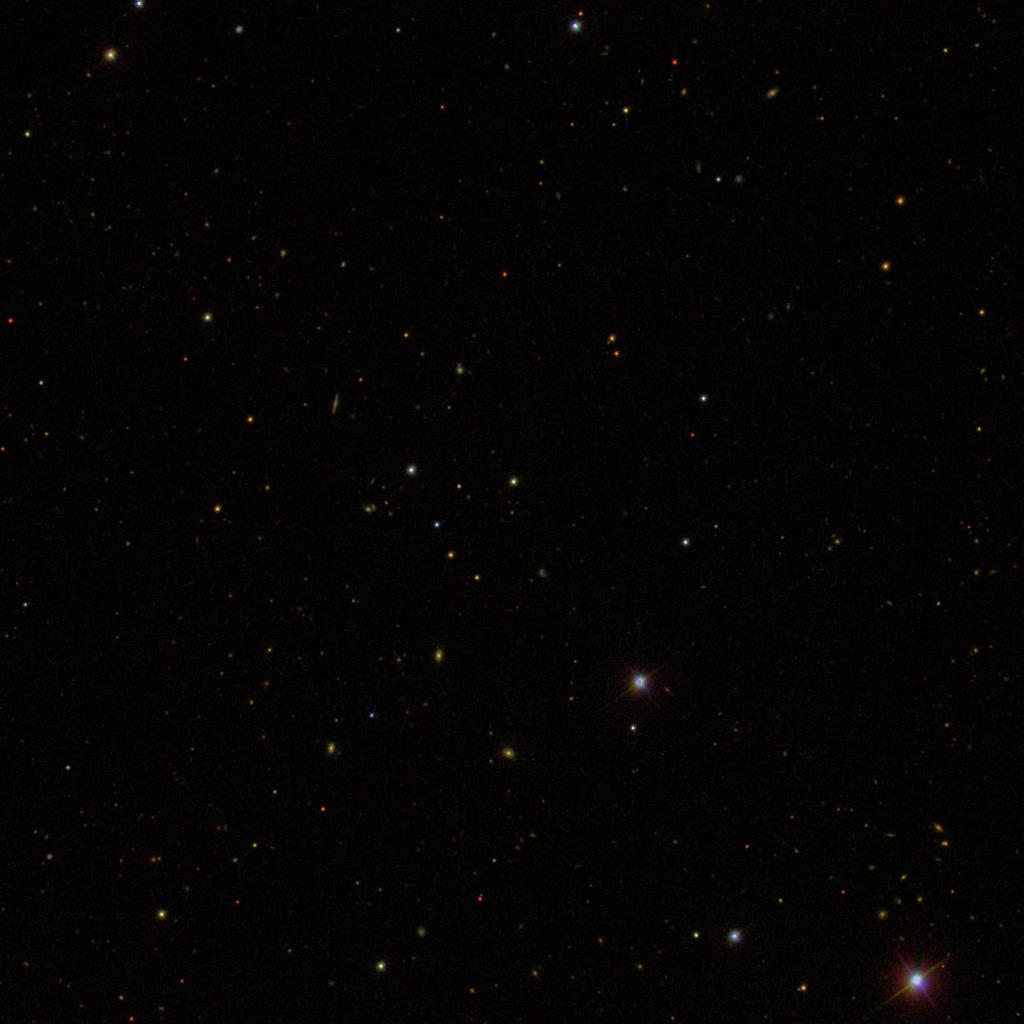

In [ ]:
display(Image('Quasar.jpg'))

# Gathering Quasar Images

There is a list of 46420 detected quasars from the <a href="http://astrostatistics.psu.edu/datasets/SDSS_quasar.html">Penn State Center for Astrostatistics</a>. We will use their <a href="http://astrostatistics.psu.edu/datasets/SDSS_quasar.dat">SDSS_quasar.dat</a> data set and the <a href="http://www.astropy.org/">AstroPy</a> python package.

In [ ]:
Quasars = pd.read_fwf('SDSS_quasar.dat')

In [ ]:
Quasars.head()

,SDSS_J,R.A.,Dec.,z,u_mag,sig_u,g_mag,sig_g,r_mag,sig_r,...,sig_z,Radio,X-ray,J_mag,sig_J,H_mag,sig_H,K_mag,sig_K,M_i
0,000009.26+151754.5,0.038605,15.298476,1.1986,19.921,0.042,19.811,0.036,19.386,0.017,...,0.069,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-25.085
1,000009.38+135618.4,0.039088,13.938447,2.2400,19.218,0.026,18.893,0.022,18.445,0.018,...,0.033,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-27.419
2,000009.42-102751.9,0.039269,-10.464428,1.8442,19.249,0.036,19.029,0.027,18.980,0.021,...,0.047,0.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-26.459
3,000011.41+145545.6,0.047547,14.929353,0.4596,19.637,0.030,19.466,0.024,19.362,0.022,...,0.047,-1.0,-9.00,0.000,0.000,0.00,0.000,0.000,0.000,-22.728
4,000011.96+000225.3,0.049842,0.040372,0.4790,18.237,0.028,17.971,0.020,18.025,0.019,...,0.029,0.0,-1.66,16.651,0.136,15.82,0.149,14.821,0.111,-24.046


In [ ]:
Quasars.tail() # 46420 rows

,SDSS_J,R.A.,Dec.,z,u_mag,sig_u,g_mag,sig_g,r_mag,sig_r,...,sig_z,Radio,X-ray,J_mag,sig_J,H_mag,sig_H,K_mag,sig_K,M_i
46415,235949.46+150430.6,359.9560,15.075185,0.2977,19.094,0.025,18.966,0.023,18.668,0.016,...,0.033,-1.0,-1.429,16.676,0.180,15.661,0.176,15.187,0.130,-22.286
46416,235953.44-093655.6,359.9726,-9.615454,0.3585,19.509,0.045,19.276,0.022,18.895,0.018,...,0.039,0.0,-9.000,16.976,0.173,16.188,0.164,15.502,0.238,-22.549
46417,235956.72+135131.7,359.9863,13.858825,2.3826,20.010,0.040,19.427,0.027,19.217,0.018,...,0.048,-1.0,-9.000,0.000,0.000,0.000,0.000,0.000,0.000,-26.665
46418,235958.21+005139.8,359.9925,0.861062,2.0382,19.256,0.034,19.004,0.021,18.794,0.017,...,0.036,0.0,-9.000,0.000,0.000,0.000,0.000,0.000,0.000,-26.900
46419,235959.06-090944.0,359.9960,-9.162229,1.2845,18.403,0.021,18.373,0.015,18.139,0.024,...,0.036,0.0,-9.000,0.000,0.000,0.000,0.000,0.000,0.000,-26.297


In [ ]:
coord = SkyCoord(str(Quasars.iloc[1]['R.A.'])+'d',str(Quasars.iloc[1]['Dec.'])+'d',frame='icrs')

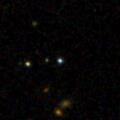

In [ ]:
impix = 120
imsize = 1*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urllib.parse.urlencode(dict(ra=coord.ra.deg, 
                                     dec=coord.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string
urllib.request.urlretrieve(url, 'Quasar_1.jpg')
display(Image('Quasar_1.jpg'))

In [ ]:
def get_image(coordinate,name, impix = 120):
    '''
    Downloads the image from the SDSS DR12 release as a impix pixel by impix pixel image.
    
    Parameters
    ----------
    coordinate : coordinate of the celestial object as a Sky Coordinate.
    name: The name string to save the image as. It will be saved as 'name.jpg'.
    
    '''
    imsize = 1*u.arcmin
    cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
    query_string = urllib.parse.urlencode(dict(ra=coordinate.ra.deg, 
                                     dec=coordinate.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
    url = cutoutbaseurl + '?' + query_string
    urllib.request.urlretrieve(url, './Images/' + name + '.jpg')

In [ ]:
get_image(coord,'test1')
# Worked successfully

In [ ]:
# Some data manipulation to get Sky Coordinates for each entry.
# The application of the SkyCoord function will take time.
QuasarLocs = pd.concat([Quasars['R.A.'].apply(lambda x: str(x)+'d '), 
                        Quasars['Dec.'].apply(lambda x: str(x)+'d')], axis=1)
QuasarLocs['Coords']= QuasarLocs[['R.A.','Dec.']].apply(lambda x: SkyCoord(x[0],x[1],frame='icrs'), axis=1)

In [ ]:
QuasarLocs.head()

,R.A.,Dec.,Coords
0,0.038605d,15.298476d,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 0.03..."
1,0.039088d,13.938447d,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 0.03..."
2,0.039269d,-10.464428d,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 0.03..."
3,0.047547000000000006d,14.929353d,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 0.04..."
4,0.049842000000000004d,0.040372000000000005d,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 0.04..."


In [ ]:
# We will now download these images from SDSS DR12
for i in range(46420):
    get_image(QuasarLocs['Coords'].iloc[i],name='Quasar_'+str(i))

# Gathering Non-quasar Celestial Objects

We will use SIMBAD to find objects that are not Quasars or Quasar Candidates. We will sample 200 random regions in the SDSS footprint and take 500 objects from each region.

In [ ]:
# Limit the number of results we get from our query.
Simbad.ROW_LIMIT = 20000

In [ ]:
# We will stay in the 8h to 16h +0d to +60 footprint region of SDSS. 
# Note that there are some regions in SDSS DR 12 and DR 13 outside of this range, 
# but this range covers a majority of the footprint.
# As the box we form is 8d by 8d, we start at 124d and end at 236d for longitude,
# and start as +4d to +56d in latitude.
NonQuasars = pd.DataFrame()
randcoord =[]
for i in range(200):
    randcoord.append(str(np.random.randint(128,237))+'d +' + str(np.random.randint(4,57))+'d')
    try: 
        # For otype, QSO are quasars, Q? are quasar candidates, and LeQ are gravitationally lenses quasars.
        result = Simbad.query_criteria('region(box,' + randcoord[i] + ', 4d +4d)','otype != QSO','otype != Q?','otype != LeQ')
        sample = result.to_pandas().sample(500)
        NonQuasars = pd.concat([NonQuasars,sample],axis=0)
        if i % 10 == 0:
            print('At attempt %s' % i)
    except:
        print('Attempt Failed... retrying')
        i = i-1        

At attempt [0]
At attempt [10]
At attempt [20]
At attempt [30]
At attempt [40]
At attempt [50]
At attempt [60]
Attempt Failed... retrying
At attempt [70]
At attempt [80]
At attempt [90]
At attempt [100]
At attempt [110]
At attempt [120]
At attempt [130]
At attempt [140]
At attempt [150]
At attempt [160]
Attempt Failed... retrying
At attempt [170]
At attempt [180]
At attempt [190]


In [ ]:
NonQuasars

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
4419,b'[TRB2013] 227.70742+05.81570',15 10 49.786,+05 48 56.56,7.0,7.0,10.000000,10.000000,90.0,C,O,b'2013yCat.5139....0A'
78,b'2MASX J15190843+0725544',15 19 08.437,+07 25 54.48,7.0,7.0,NaN,NaN,0.0,B,I,b'2006AJ....131.1163S'
2478,b'[TCC97] ACO 2052 329',15 14 04.6,+06 22 54,5.0,5.0,5000.000000,5000.000000,90.0,D,,b'1997A&AS..125..459T'
2412,b'PTF 12fuu',15 04 40.39,+06 04 21.0,6.0,6.0,NaN,NaN,0.0,D,,b'2012ATel.4290....1G'
4127,b'WiggleZ S15J151547006+05441318',15 15 47.004,+05 44 13.17,7.0,7.0,202.000000,104.000000,0.0,C,O,b'2009yCat.2294....0A'
5836,b'SDSSCGA 184',15 08 32.2,+05 50 35,5.0,5.0,NaN,NaN,0.0,D,O,b'2009MNRAS.395..255M'
1139,b'2MASX J15145416+0414434',15 14 54.166,+04 14 43.50,7.0,7.0,NaN,NaN,0.0,B,I,b'2006AJ....131.1163S'
6324,b'WiggleZ S15J151641226+05502728',15 16 41.227,+05 50 27.29,7.0,7.0,117.000000,115.000000,90.0,C,O,b'2009yCat.2294....0A'
5113,b'[TRB2013] 227.62819+05.26153',15 10 30.766,+05 15 41.51,7.0,7.0,38.000000,16.000000,0.0,C,O,b'2013yCat.5139....0A'
730,b'WiggleZ S15J151830812+04190651',15 18 30.807,+04 19 06.30,7.0,7.0,74.000000,69.000000,0.0,C,O,b'2009yCat.2294....0A'


In [ ]:
# Checking for duplicates, which is a possibility in this process.
NonQuasars[NonQuasars.duplicated()]

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
1297,b'NSC J124834+550230',12 48 34.83,+55 02 29.6,6.0,6.0,NaN,NaN,0.0,D,,b'2003AJ....125.2064G'
167,b'SDSS J124958.66+554925.5',12 49 58.666,+55 49 25.52,7.0,7.0,65.000000,48.000000,0.0,C,O,b'2009yCat.2294....0A'
1378,b'SDSSCGB 73374.4',12 47 17.287,+53 58 39.34,7.0,7.0,NaN,NaN,0.0,C,O,b'2009yCat.2294....0A'
2421,b'SDSS J124802.92+552828.7',12 48 02.920,+55 28 28.72,7.0,7.0,60.000000,44.000000,0.0,C,O,b'2009yCat.2294....0A'
1332,b'LEDA 2480646',12 49 47.0,+54 47 52,5.0,5.0,NaN,NaN,0.0,D,O,b'2003A&A...412...45P'
1141,b'SDSSCGB 20128.1',12 47 08.501,+55 28 05.19,7.0,7.0,NaN,NaN,0.0,C,O,b'2009yCat.2294....0A'
697,b'HD 238160',12 47 26.3265,+54 46 13.054,8.0,8.0,48.110001,26.209999,90.0,B,,b'1998A&A...335L..65H'
2865,b'SDSSCGB 47157',12 46 13.1,+55 47 39,5.0,5.0,NaN,NaN,0.0,D,O,b'2009MNRAS.395..255M'
2054,b'SDSS J124840.34+541726.2',12 48 40.34,+54 17 26.2,6.0,6.0,NaN,NaN,0.0,C,O,b'2008ApJS..175..297A'
2215,b'LEDA 2490425',12 47 19.5,+55 05 49,5.0,5.0,NaN,NaN,0.0,D,O,b'2003A&A...412...45P'


In [ ]:
# As duplicates were found, we will drop all but the first.
NonQuasars = NonQuasars.drop_duplicates(keep='first')

In [ ]:
# Reindexing
NonQuasars.reset_index(inplace=True)
NonQuasars.drop('index', axis=1, inplace=True)

C:\Users\plessas\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [ ]:
# Saving a copy of the data to accompany the images.
NonQuasars.to_csv('NonQuasarsData.csv',index=False)

In [ ]:
NonQuasars.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
0,b'[TRB2013] 227.70742+05.81570',15 10 49.786,+05 48 56.56,7.0,7.0,10.0,10.0,90.0,C,O,b'2013yCat.5139....0A'
1,b'2MASX J15190843+0725544',15 19 08.437,+07 25 54.48,7.0,7.0,NaN,NaN,0.0,B,I,b'2006AJ....131.1163S'
2,b'[TCC97] ACO 2052 329',15 14 04.6,+06 22 54,5.0,5.0,5000.0,5000.0,90.0,D,NaN,b'1997A&AS..125..459T'
3,b'PTF 12fuu',15 04 40.39,+06 04 21.0,6.0,6.0,NaN,NaN,0.0,D,NaN,b'2012ATel.4290....1G'
4,b'WiggleZ S15J151547006+05441318',15 15 47.004,+05 44 13.17,7.0,7.0,202.0,104.0,0.0,C,O,b'2009yCat.2294....0A'


In [ ]:
NonQuasars.tail() #94670 rows

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
94665,b'LEDA 2411016',15 08 00.3,+52 16 41,5.0,5.0,NaN,NaN,0.0,D,O,b'2003A&A...412...45P'
94666,b'SDSSCGB 51281.3',15 05 34.541,+52 00 48.57,7.0,7.0,NaN,NaN,0.0,C,O,b'2009yCat.2294....0A'
94667,b'NVSS J151555+503517',15 15 55.1,+50 35 14,5.0,5.0,1000.0,1000.0,90.0,C,R,b'1997ApJ...475..479W'
94668,b'MCG+09-25-033',15 12 17.963,+50 33 28.53,7.0,7.0,NaN,NaN,0.0,B,I,b'2006AJ....131.1163S'
94669,b'[SPD2011] 7549',14 57 40.1,+49 30 15,5.0,5.0,NaN,NaN,0.0,E,O,b'2011ApJ...736...21S'


In [ ]:
def RAtoICRS(RAValue):
    '''
    Converts SIMBAD Right Ascent (RA) format to ICRS format.
    
    Parameters
    ----------
    RAValue : A SIMBAD Right Ascent value in "X Y Z" format for X hours, Y minutes, and Z seconds.
    
    '''
    if len(RAValue.split()) == 1:
        return '%sh' % (RAValue.split()[0])
    elif len(RAValue.split()) == 2:
        return '%sh%sm' % (RAValue.split()[0], RAValue.split()[1])
    elif len(RAValue.split()) == 3: 
        return '%sh%sm%ss' % (RAValue.split()[0], RAValue.split()[1], RAValue.split()[2])
    else: 
        return np.nan()
    
def DECtoICRS(DECValue):
    '''
    Converts SIMBAD Declination (DEC) format to ICRS format.
    
    Parameters
    ----------
    RAValue : A SIMBAD Declination value in "+X Y Z" format for X degrees, Y minutes, and Z seconds.
    
    '''
    if len(DECValue.split()) == 1:
        return '%sd' % (DECValue.split()[0])
    elif len(DECValue.split()) == 2:
        return '%sd%sm' % (DECValue.split()[0], DECValue.split()[1])
    elif len(DECValue.split()) == 3: 
        return '%sd%sm%ss' % (DECValue.split()[0], DECValue.split()[1], DECValue.split()[2])
    else: 
        return np.nan()

In [ ]:
# Data manipulation to get Sky Coordinates for each entry.
# Note that SIMBAD gives the values separated as hours, minutes, seconds for RA and degrees, minutes, seconds for Dec
NonQuasarLocs = pd.concat([NonQuasars['RA'].apply(RAtoICRS), 
                           NonQuasars['DEC'].apply(DECtoICRS)], axis=1)
NonQuasarLocs['Coords']= NonQuasarLocs[['RA','DEC']].apply(lambda x: SkyCoord(x[0],x[1],frame='icrs'), axis=1)

In [ ]:
NonQuasarLocs.head()

,RA,DEC,Coords
0,15h10m49.786s,+05d48m56.56s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 227...."
1,15h19m08.437s,+07d25m54.48s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 229...."
2,15h14m04.6s,+06d22m54s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 228...."
3,15h04m40.39s,+06d04m21.0s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 226...."
4,15h15m47.004s,+05d44m13.17s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 228...."


In [ ]:
# We will now download these images from SDSS DR12
for i in range(94670):
    get_image(NonQuasarLocs['Coords'].iloc[i],name='NonQ_'+str(i))

# Gathering Quasar Candidates

We will now use SIMBAD to identify quasar candidates for analysis with our trained model.

In [ ]:
# As with the Non-quasar data, we will stay in the 8h to 16h +0d to +60 footprint 
# region of SDSS. Note that there are some regions in SDSS DR 12 and DR 13 outside 
# of this range, but this range covers a majority of the footprint.
# Due to timeout issues from SIMBAD, we will use smaller regions
# of width 10d by +6d to gather the candidates.
QuasarCandidates = pd.DataFrame()
for i in range(12): # Separate longitude into 12 segments of length 10d
    for j in range(10): # Separate latitude into 10 segments of length 6d
            try: 
                # For otype Q? are quasar candidates.
                result = Simbad.query_criteria('region(box,' + str(125+10*i)+'d +' + str(3+6*j) + 'd' + ', 5d +3d)','otype = Q?')
                QuasarCandidates = pd.concat([QuasarCandidates,result.to_pandas()],axis=0)
                if (i*10+j) % 20 == 0:
                    print('At attempt %s' % (i*10+j))
            except:
                print('Attempt Failed at i=%s and j=%s.' % (i,j))

At attempt 0
At attempt 20
At attempt 40
At attempt 60
At attempt 80
At attempt 100


In [ ]:
QuasarCandidates.head()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
0,b'SDSS J082207.76+034040.3',08 22 07.762,+03 40 40.39,7.0,7.0,83.0,75.0,0.0,C,O,b'2009yCat.2294....0A'
0,b'4C 07.25',08 30 05.3,+07 45 46,5.0,5.0,NaN,NaN,0.0,D,,b''
1,b'SDSS J082847.31+090335.2',08 28 47.312,+09 03 35.22,7.0,7.0,74.0,69.0,0.0,C,O,b'2009yCat.2294....0A'
2,b'NVSS J081429+090749',08 14 29.085,+09 07 48.52,7.0,7.0,159.0,121.0,0.0,C,O,b'2009yCat.2294....0A'
3,b'2MASS J08221083+0743435',08 22 10.830,+07 43 43.59,7.0,7.0,170.0,100.0,90.0,B,N,b'2003yCat.2246....0C'


In [ ]:
QuasarCandidates.tail()

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
34,b'USNO-A2.0 1425-08394781',15 53 37.759,+57 48 38.81,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
35,b'USNO-A2.0 1425-08369481',15 46 26.011,+58 21 11.34,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
36,b'GALEX 2680919436624400066',15 54 13.375,+58 11 33.90,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
37,b'USNO-A2.0 1425-08408588',15 57 41.299,+56 01 23.63,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
38,b'USNO-A2.0 1425-08387451',15 51 26.251,+57 53 54.28,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'


In [ ]:
# Checking for duplication
QuasarCandidates[QuasarCandidates.duplicated()]

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE


In [ ]:
# Reindexing
QuasarCandidates.reset_index(inplace=True)
QuasarCandidates.drop('index', axis=1, inplace=True)

In [ ]:
QuasarCandidates.tail() # 5418 rows

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
5413,b'USNO-A2.0 1425-08394781',15 53 37.759,+57 48 38.81,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
5414,b'USNO-A2.0 1425-08369481',15 46 26.011,+58 21 11.34,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
5415,b'GALEX 2680919436624400066',15 54 13.375,+58 11 33.90,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
5416,b'USNO-A2.0 1425-08408588',15 57 41.299,+56 01 23.63,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'
5417,b'USNO-A2.0 1425-08387451',15 51 26.251,+57 53 54.28,7.0,7.0,NaN,NaN,0.0,D,,b'2007ApJ...664...53A'


In [ ]:
# Saving a copy of the data to accompany the images.
QuasarCandidates.to_csv('QuasarCandidatesData.csv',index=False)

In [ ]:
# Data manipulation to get Sky Coordinates for each entry.
# Note that SIMBAD gives the values separated as hours, minutes, seconds for RA and degrees, minutes, seconds for Dec
QuasarCandidateLocs = pd.concat([QuasarCandidates['RA'].apply(RAtoICRS), 
                           QuasarCandidates['DEC'].apply(DECtoICRS)], axis=1)
QuasarCandidateLocs['Coords']= QuasarCandidateLocs[['RA','DEC']].apply(lambda x: SkyCoord(x[0],x[1],frame='icrs'), axis=1)

In [ ]:
QuasarCandidateLocs.head()

,RA,DEC,Coords
0,08h22m07.762s,+03d40m40.39s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 125...."
1,08h30m05.3s,+07d45m46s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 127...."
2,08h28m47.312s,+09d03m35.22s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 127...."
3,08h14m29.085s,+09d07m48.52s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 123...."
4,08h22m10.830s,+07d43m43.59s,"<SkyCoord (ICRS): (ra, dec) in deg\n ( 125...."


In [ ]:
# We will now download these images from SDSS DR12
for i in range(5418):
    get_image(QuasarCandidateLocs['Coords'].iloc[i],name='QuasarCandidate_'+str(i))